 Import relevant libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, KFold, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import roc_auc_score, precision_score, confusion_matrix
from scipy import stats
from sklearn.inspection import PartialDependenceDisplay
import shap
from imblearn.over_sampling import SMOTE

C:\Users\Hp\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    Load the training and test data into relevant data frames

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Review the initial rows of the data frame

In [3]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


Review the dimensions of the data frame

In [4]:
train_data.shape

(165034, 14)

Check the data types of the features in the data frame

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


Check for duplicate values

In [6]:
train_data.duplicated().sum()

0

Perform descriptive statistics on the data

In [7]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Check the unique values in some numerical and categorical features

In [8]:
train_data['Gender'].value_counts()

Male      93150
Female    71884
Name: Gender, dtype: int64

In [9]:
train_data['Geography'].value_counts()

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64

In [10]:
train_data['NumOfProducts'].value_counts()

2    84291
1    77374
3     2894
4      475
Name: NumOfProducts, dtype: int64

In [11]:
train_data['HasCrCard'].value_counts()

1.0    124428
0.0     40606
Name: HasCrCard, dtype: int64

In [12]:
train_data["IsActiveMember"].value_counts()

0.0    82885
1.0    82149
Name: IsActiveMember, dtype: int64

In [13]:
train_data['Exited'].value_counts()

0    130113
1     34921
Name: Exited, dtype: int64

As we can see above, there is a class imbalance. Class 1 represents only 21% of the data. We will have use an oversampling technique such as SMOTE to generate synthetic date.

Perform uni-variate analysis

<Figure size 800x600 with 0 Axes>

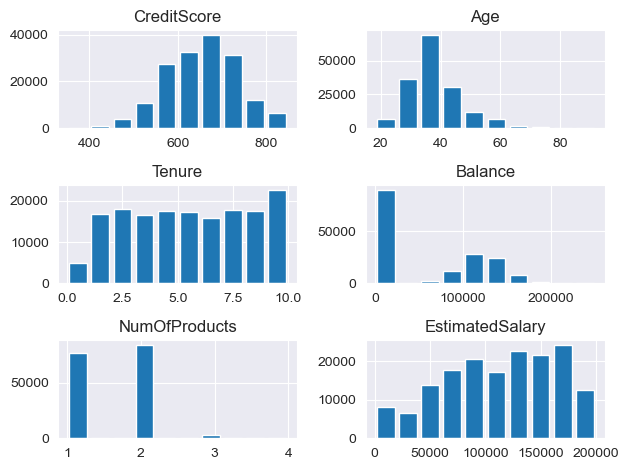

In [14]:
plt.figure(figsize=(8, 6))
train_data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].hist(rwidth=0.8)
plt.tight_layout() 

<Axes: >

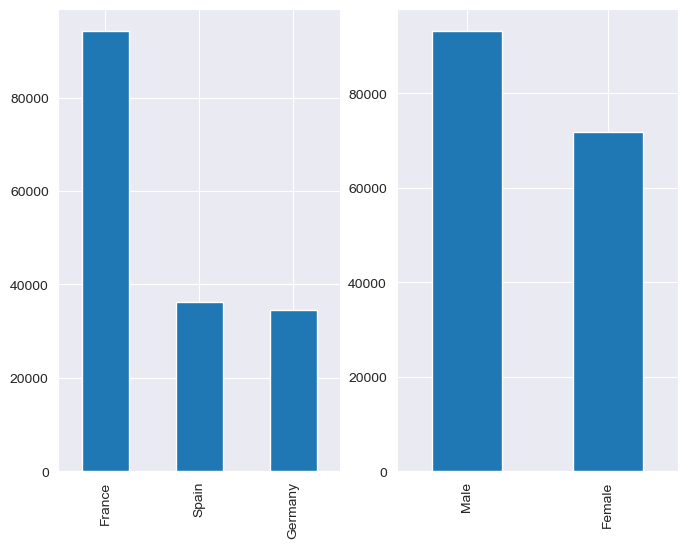

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(8, 6))
train_data['Geography'].value_counts().plot(kind='bar', stacked=True, ax=ax1)
train_data['Gender'].value_counts().plot(kind='bar', stacked=True, ax=ax2)

Perform Bi-variate analysis

<Axes: xlabel='Geography', ylabel='count'>

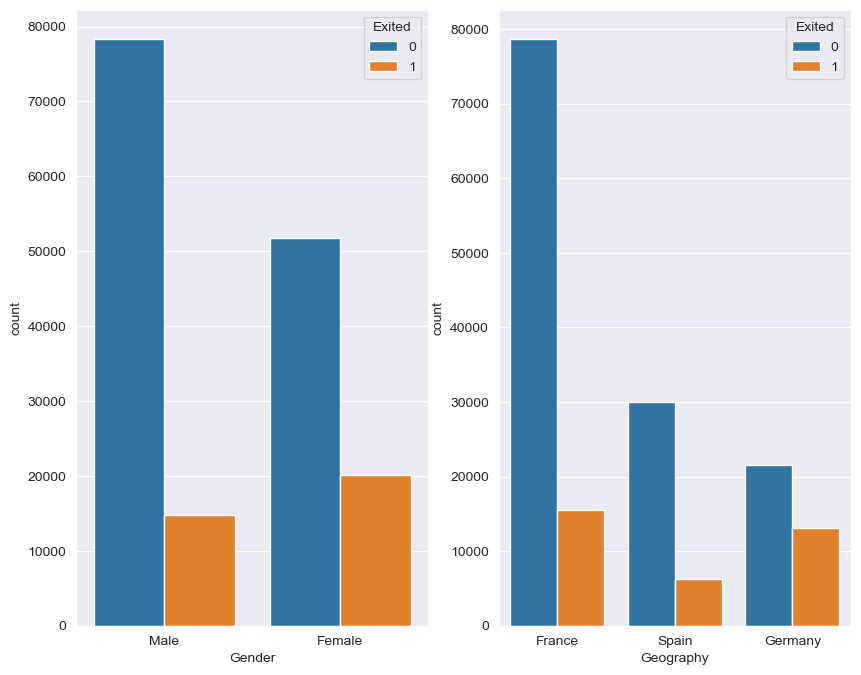

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 8))
sns.countplot(x='Gender', hue='Exited', data=train_data, ax=ax1)
sns.countplot(x='Geography', hue='Exited', data=train_data, ax=ax2)

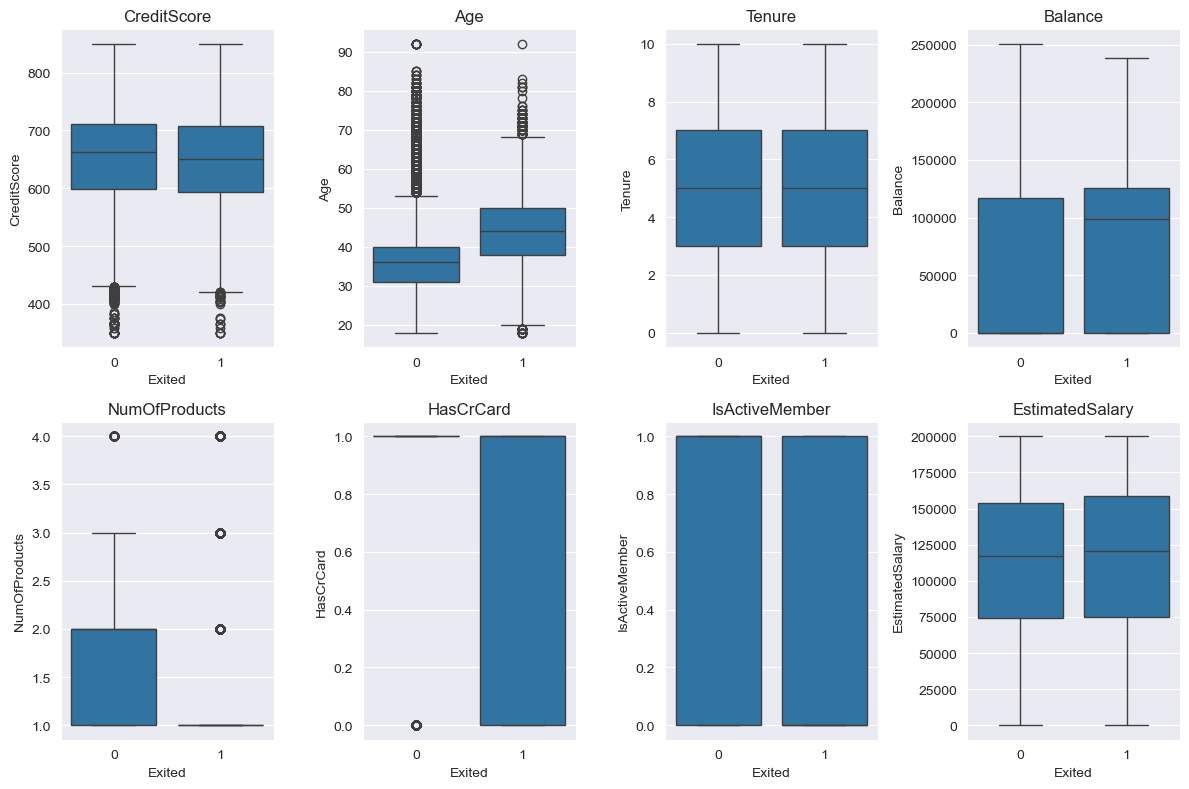

In [17]:
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

for column in columns_to_plot:
    plt.subplot(2, 4, columns_to_plot.index(column) + 1)  # Adjust the subplot arrangement
    sns.boxplot(data=train_data, x="Exited", y=column)
    plt.title(column)

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

Compute point-bi-serial correlation coefficients of numerical features with respect the binary target variable

In [18]:
columns_cf = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                   'IsActiveMember', 'EstimatedSalary', 'Exited']

point_biserial_correlations = {}

for column in columns_cf:
    corr_coeff, p_value = stats.pointbiserialr(train_data[column], train_data['Exited'])
    point_biserial_correlations[column] = corr_coeff

# Sort correlations in descending order
sorted_correlations = sorted(point_biserial_correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Print correlations
for feature, correlation in sorted_correlations:
    print(f"{feature}: {correlation:.2f}")

Exited: 1.00
Age: 0.34
NumOfProducts: -0.21
IsActiveMember: -0.21
Balance: 0.13
CreditScore: -0.03
HasCrCard: -0.02
Tenure: -0.02
EstimatedSalary: 0.02


Feature Engineering

In [19]:
train_data['Balance_to_Salary'] = train_data['Balance']/train_data['EstimatedSalary']
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_to_Salary
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.000000
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.000000
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.000000
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.760655
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.000000


Create a custom transformer to select specific features from the data frame, and then create pipelines for numerical and categorical features.

In [20]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [21]:
num_pipeline = Pipeline([
    ("select_numerical", DataFrameSelector(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Balance_to_Salary'])),
    ("imputer", SimpleImputer(strategy="median")),
    ("standardizer", StandardScaler())
])

In [22]:
num_pipeline.fit_transform(train_data)

array([[ 1.44134588e-01, -5.78074336e-01, -7.19973392e-01, ...,
        -9.95550213e-01,  1.36948561e+00, -2.29250798e-02],
       [-3.67705792e-01, -5.78074336e-01, -1.43269365e+00, ...,
         1.00446968e+00, -1.25408471e+00, -2.29250798e-02],
       [ 2.68973705e-01,  2.11353847e-01,  1.77454751e+00, ...,
        -9.95550213e-01,  1.43742230e+00, -2.29250798e-02],
       ...,
       [-1.14170832e+00, -8.03625246e-01, -7.25313374e-03, ...,
         1.00446968e+00,  2.95365597e-01, -2.29250798e-02],
       [-1.27903135e+00, -9.16400700e-01,  7.05467125e-01, ...,
         1.00446968e+00, -8.23216528e-01,  1.84061160e-03],
       [ 2.41620652e+00, -8.03625246e-01, -1.43269365e+00, ...,
        -9.95550213e-01, -1.01392487e+00, -2.29250798e-02]])

In [23]:
cat_pipeline = Pipeline([
    ("select_categorical", DataFrameSelector(['Geography', 'Gender'])),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse_output=False))
])

In [24]:
cat_pipeline.fit_transform(train_data)

array([[1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.]])

In [25]:
categories = cat_pipeline.named_steps['encoder'].categories_
categories

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [26]:
preprocess_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [27]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[ 0.14413459, -0.57807434, -0.71997339, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36770579, -0.57807434, -1.43269365, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.2689737 ,  0.21135385,  1.77454751, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.14170832, -0.80362525, -0.00725313, ...,  0.        ,
         0.        ,  1.        ],
       [-1.27903135, -0.9164007 ,  0.70546712, ...,  1.        ,
         1.        ,  0.        ],
       [ 2.41620652, -0.80362525, -1.43269365, ...,  0.        ,
         0.        ,  1.        ]])

In [28]:
y_train = train_data["Exited"]
y_train

0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 165034, dtype: int64

Apply oversampling technique SMOTE to generate synthetic data to tackle class imbalance

In [29]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Resampled class distribution:", np.bincount(y_train))

Resampled class distribution: [130113 130113]


Initialize classifiers to check which models perform better

In [30]:
kn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)
ab = AdaBoostClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xg = XGBClassifier(random_state=42)

In [31]:
kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

A good standard value for k in k-fold cross-validation is 10, as empirical evidence shows. Experiments by Ron Kohavi on various real-world dataset
suggest that 10-fold cross-validation offers the best tradeoff between bias and variance

In [68]:
y_proba = cross_val_predict(kn, X_train, y_train, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y_train, y_proba[:, 1])
print("Cross-Validation ROC AUC Score for KN:", roc_auc)

Cross-Validation ROC AUC Score for KN: 0.9307874126090576


In [69]:
y_proba = cross_val_predict(rf, X_train, y_train, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y_train, y_proba[:, 1])
print("Cross-Validation ROC AUC Score for RF:", roc_auc)

Cross-Validation ROC AUC Score for RF: 0.9636679016847967


In [70]:
y_proba = cross_val_predict(et, X_train, y_train, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y_train, y_proba[:, 1])
print("Cross-Validation ROC AUC Score for XT:", roc_auc)

Cross-Validation ROC AUC Score for XT: 0.9705613648817577


In [71]:
y_proba = cross_val_predict(ab, X_train, y_train, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y_train, y_proba[:, 1])
print("Cross-Validation ROC AUC Score for AB:", roc_auc)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\anaconda3\Li

Cross-Validation ROC AUC Score for AB: 0.9008086096227306


In [72]:
y_proba = cross_val_predict(dt, X_train, y_train, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y_train, y_proba[:, 1])
print("Cross-Validation ROC AUC Score for DT:", roc_auc)

Cross-Validation ROC AUC Score for DT: 0.8577441168823294


In [73]:
y_proba = cross_val_predict(xg, X_train, y_train, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y_train, y_proba[:, 1])
print("Cross-Validation ROC AUC Score for XGB:", roc_auc)

Cross-Validation ROC AUC Score for XGB: 0.9558999132345075


Select RandomForest, Extra Trees and XGBoosting as their ROC AUC scores are above 0.85 for hyperparameter tuning

In [32]:
param_grid_rf = {
    "n_estimators": [50, 100],
    "max_depth": [None, 5],
    "random_state": [42]
}

param_grid_et = {
    "n_estimators": [50, 100],
    "max_depth": [None, 5],
    "random_state": [42]
}

param_grid_xg = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'random_state': [42]
}

# Create a dictionary with model names as keys and hyperparameter grids as values
models_params = {
    "RandomForest:": (rf, param_grid_rf),
    "ExtraTree": (et, param_grid_et),
    "XGBoost": (xg, param_grid_xg)
}

Perform hyperparameter tuning to select the optimal parameters

In [ ]:
for model_name, (model, param_grid) in models_params.items():
    grid_search = GridSearchCV(model, param_grid = param_grid, cv = kf, scoring = "roc_auc")
    grid_search.fit(X_train, y_train)
    
    print(f"Best Hyperparameters for {model_name}:", grid_search.best_params_)

Fit the data to the better models with their respective optimal parameters to identify the best model

In [33]:
fr = RandomForestClassifier(n_estimators = 100, max_depth = None, random_state = 42)
et = ExtraTreesClassifier(n_estimators = 100, max_depth = None, random_state = 42)
xg = XGBClassifier(n_estimators = 100, max_depth = 5, learning_rate = 0.1, random_state = 42)

classifiers = [fr, et, xg]

In [84]:
for classifier in classifiers:
    y_proba = cross_val_predict(estimator=classifier, X=X_train, y=y_train, cv=kf, method="predict_proba")
    
    # Compute ROC AUC score across all folds
    score = roc_auc_score(y_train, y_proba[:, 1])
    
    print(f"Classifier: {classifier}")
    print(f"ROC AUC score: {score}")
    print("\n")

Classifier: RandomForestClassifier(random_state=42)
ROC AUC score: 0.963289027493175

Classifier: ExtraTreesClassifier(random_state=42)
ROC AUC score: 0.9691352976666237

Classifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
ROC AUC score: 0.9464063993977739


The Extra Tree classifier has the highest ROC AUC Score of 0.889, therefore we will use select this classifier on the train and test data

In [34]:
X_t, X_holdout, y_t, y_holdout = train_test_split(X_train, y_train, test_size = 0.05, random_state = 42)

Keeping dev set at 5% as the dataset is large enough already

In [35]:
et.fit(X_t, y_t)

y_proba_train = et.predict_proba(X_t)
train_roc_auc = roc_auc_score(y_t, y_proba_train[:, 1])
train_precision = precision_score(y_t, et.predict(X_t))

y_proba_holdout = et.predict_proba(X_holdout)
holdout_roc_auc = roc_auc_score(y_holdout, y_proba_holdout[:, 1])
holdout_precision = precision_score(y_holdout, et.predict(X_holdout))

print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Precision: {train_precision}")
print(f"Holdout ROC AUC: {holdout_roc_auc}")
print(f"Holdout Precision: {holdout_precision}")

Train ROC AUC: 0.9999999422725349
Train Precision: 1.0
Holdout ROC AUC: 0.972232552553983
Holdout Precision: 0.9028129185890758


In [36]:
cm = confusion_matrix(y_holdout, et.predict(X_holdout))
print("Confusion Matrix:")
print(cm)

# Interpret the matrix
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

Confusion Matrix:
[[5818  653]
 [ 475 6066]]
True Positives: 6066
True Negatives: 5818
False Positives: 653
False Negatives: 475


Both scores on training and hold out datasets are relatively high, indicating that the classifier is performing well on both the training and holdout data. We will regularize the model by setting max_features to consider square root of the total features.

In [37]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [38]:
test_data['Balance_to_Salary'] = test_data['Balance']/test_data['EstimatedSalary']
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Balance_to_Salary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,0.000000
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,0.000000
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,0.000000
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,0.000000
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0.869703


In [39]:
X_test = preprocess_pipeline.transform(test_data)
X_test

array([[-0.87954617, -1.70582888, -1.07633352, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.33139326,  0.88800657, -1.07633352, ...,  0.        ,
         1.        ,  0.        ],
       [-0.00567235, -0.46529888,  0.70546712, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.6934267 , -0.80362525, -1.07633352, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.65597497, -0.69084979, -0.71997339, ...,  0.        ,
         1.        ,  0.        ],
       [-0.44260926, -0.12697252,  0.70546712, ...,  0.        ,
         1.        ,  0.        ]])

In [40]:
predictions = et.predict_proba(X_test)
churn_prob = predictions[:, 1]

In [41]:
test_data["id"]

0         165034
1         165035
2         165036
3         165037
4         165038
           ...  
110018    275052
110019    275053
110020    275054
110021    275055
110022    275056
Name: id, Length: 110023, dtype: int64

In [42]:
result = pd.concat([test_data["id"].reset_index(drop=True), pd.Series(churn_prob)], axis=1)

In [43]:
result.head()

,id,0
0,165034,0.01
1,165035,0.96
2,165036,0.02
3,165037,0.26
4,165038,0.47


In [44]:
result.to_csv('result.csv', index=False)

Implement Stacking and Blending

In [95]:
fitted_classifiers = []
for classifier in classifiers:
    classifier.fit(X_t, y_t)
    fitted_classifiers.append(classifier)

In [96]:
predictions_subset2 = []
for classifier in fitted_classifiers:
    predictions = classifier.predict(X_holdout)
    predictions_subset2.append(predictions)

In [97]:
#Create a feature matrix of all the predictions by the models
blending_feature_matrix = np.column_stack(predictions_subset2)

In [98]:
# Train a blending model (meta-model) on the blending feature matrix and true labels of subset2
blending_model = ExtraTreesClassifier(n_estimators = 100, max_depth = None, random_state = 42)
blending_model.fit(blending_feature_matrix, y_holdout)
blending_predictions = blending_model.predict(blending_feature_matrix)

In [99]:
blending_roc_auc = roc_auc_score(y_holdout, blending_predictions)
blending_precision = precision_score(y_holdout, blending_predictions)
print("ROC AUC Score for Blending Model:", blending_roc_auc)
print("Precision for Blending Model:", blending_precision)

ROC AUC Score for Blending Model: 0.906778797186111
Precision for Blending Model: 0.8865253402415442


Model Interpretability using Feature Importance, Partial Dependence Plot, SHAP (Shapely Additive Explanations) and LIME (Local Interpretable Model-agnostic Explanations)

In [45]:
features_importance = et.feature_importances_
feature_names = pd.Series(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'France', 'Germany', 'Spain', 'Female', 'Male', 'Balance_to_Salary'])

features_importance = pd.Series(features_importance)
df = pd.concat([feature_names, features_importance], axis=1)
df

,0,1
0,CreditScore,0.111163
1,Age,0.219945
2,Tenure,0.103845
3,Balance,0.075197
4,NumOfProducts,0.183059
5,HasCrCard,0.007633
6,IsActiveMember,0.055630
7,EstimatedSalary,0.108232
8,France,0.055496
9,Germany,0.012405


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'CreditScore'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'Tenure'),
  Text(3, 0, 'Balance'),
  Text(4, 0, 'NumOfProducts'),
  Text(5, 0, 'HasCrCard'),
  Text(6, 0, 'IsActiveMember'),
  Text(7, 0, 'EstimatedSalary'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Germany'),
  Text(10, 0, 'Spain'),
  Text(11, 0, 'Female'),
  Text(12, 0, 'Male'),
  Text(13, 0, 'Balance_to_Salary')])

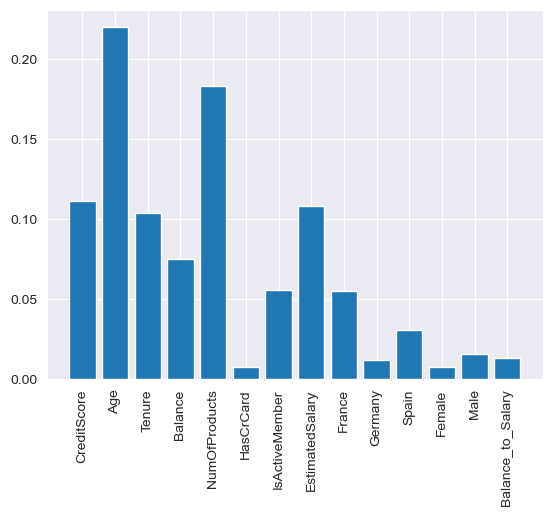

In [46]:
plt.bar(feature_names, features_importance*1)
plt.xticks(rotation=90)

It's clear that Age and NumOfProducts are the most important features. We'll plot a partial dependence graph to examine how their combined interaction affects the target variable.

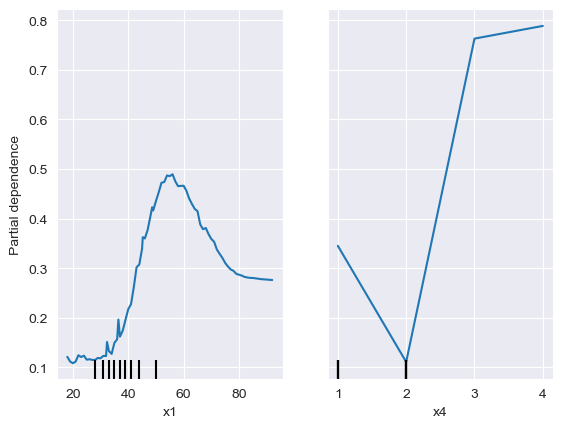

In [92]:
PartialDependenceDisplay.from_estimator(et, X_test, [1, 4, (1, 4)])

In [36]:
k_explainer = shap.KernelExplainer(et.predict_proba, X_t)

Using 247214 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [43]:
shap_values = k_explainer.shap_values(X_t)

  0%|          | 0/247214 [01:43<?, ?it/s]


MemoryError: Unable to allocate 53.5 GiB for an array with shape (2076, 3460996) and data type float64

In [ ]:
shap.summary_plot(shap_values[1], X_holdout)

In [ ]:
shap.summary_plot(shap_values, X_holdout)

In case we want to explain a particular instance (row), we can use LIME

In [56]:
from lime import lime_tabular, lime_text
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_t, mode='classification', feature_names=feature_names)
instance_idx = 1
instance = X_t[instance_idx]
explanation = explainer.explain_instance(instance, et.predict_proba, num_features=3)
print(explanation.as_list())

[('Female > 0.00', 0.056467018985272094), ('Spain <= 0.00', -0.03346393955740987), ('0.00 < Male <= 1.00', 0.029335445018389344)]


Interpretation of instance 1
Being female increases the likelihood of churn, as indicated by the positive weight.
Not being from Spain decreases the likelihood of churn, as indicated by the negative weight.
Being male also slightly increases the likelihood of churn, although to a lesser extent compared to being female, as indicated by the positive weight.